<a href="https://colab.research.google.com/github/YujiSue/CppOnColabJ/blob/main/%E3%83%90%E3%82%A4%E3%82%AA%E3%82%A4%E3%83%B3%E3%83%95%E3%82%A9%E3%83%9E%E3%83%86%E3%82%A3%E3%82%AF%E3%82%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# このノートブックについて
このノートは作者が研究用にC++で書いたバイオインフォマティクスのプログラムを、Google Colab上で利用するためのものです。  
  
Google Colabについての詳しい説明は、[トップページ](https://colab.research.google.com/notebooks/intro.ipynb)を参照してください。

# 使用方法
まず手順１に従ってライブラリをインストールします。  
続けて手順２-Xに従って、自分の使用したいアプリをインストールします。  
最後に使用例を参考に、パラメータを設定して実行します。  
詳細は、下記の各手順を参照してください。  
  
<font color="red">※注意  
ライブラリと各アプリは、いずれもお使いのコンピュータではなく、Googleのシステム上にインストールされます。一定時間が経過すると、インストールしたアプリなどはリセットされてしまいますので、再度インストールが必要となります。  
詳しくは[Google ColabのFAQ](https://research.google.com/colaboratory/faq.html)を参照してください</font>

## 手順１ 必要なライブラリのインストール
下セルを実行してください。

In [2]:
import os
import subprocess
os.environ['PATH'] += ':/usr/local/lib' 
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/lib'

!wget -q "https://drive.google.com/uc?export=download&id=1PJyHsoOLymWUXS2jpyxwd_UOXj0tTDp9" -O /usr/local/include/slib.zip
!unzip /usr/local/include/slib.zip -d /usr/local/include
!rm /usr/local/include/slib.zip
!wget -q "https://drive.google.com/uc?export=download&id=1B0bNiD18uRNNkW_KyHUq0lx3RSRoembi" -O /usr/local/lib/libsobj.so
!wget -q "https://drive.google.com/uc?export=download&id=1B2pqWpEkKULhGZ7kZxf0uzLq8BWpzGXJ" -O /usr/local/lib/libsbioinfo.so
!wget -q "https://drive.google.com/uc?export=download&id=1B5JmaL4NxXQqDQRwQahTu0-NwbyXFK1Y" -O /usr/local/lib/libsapp.so


Archive:  /usr/local/include/slib.zip
  inflating: /usr/local/include/slib/sconfig.h  
  inflating: /usr/local/include/slib/curl/stdcheaders.h  
  inflating: /usr/local/include/slib/smath.h  
  inflating: /usr/local/include/slib/sbioinfo.h  
  inflating: /usr/local/include/slib/sapp.h  
  inflating: /usr/local/include/slib/curl/system.h  
  inflating: /usr/local/include/slib/curl/urlapi.h  
  inflating: /usr/local/include/slib/crypto/sha.h  
  inflating: /usr/local/include/slib/snet/snet.h  
  inflating: /usr/local/include/slib/sbasic.h  
  inflating: /usr/local/include/slib/crypto/endian.h  
  inflating: /usr/local/include/slib/sio/sfile.h  
  inflating: /usr/local/include/slib/crypto/md5.h  
  inflating: /usr/local/include/slib/sobj.h  
  inflating: /usr/local/include/slib/sapp/scuiapp.h  
  inflating: /usr/local/include/slib/sqlite/sqlite3.h  
  inflating: /usr/local/include/slib/sio/sio.h  
  inflating: /usr/local/include/slib/sutil/sxml.h  
  inflating: /usr/local/include/slib/sap

## 手順２ 各アプリのインストールと使用



### 使用するアプリの選択

* **_[GenomeConverter](#gen-conv)_**: ゲノム配列をバイナリ化したファイルを作成するアプリ。バイナリ化したゲノム配列は、作者の他のアプリで使用します。  
  
* **_[GenomeExtract](#gen-ext)_**: GenomeConverterで作成したファイルを使って、任意の位置のゲノム配列を取得するアプリ。  
  
* **_[GFFParser](#gffp)_**: GFF3フォーマットの構造を確認するためのアプリ。作者は主にAnnotDBMakerのプラグイン作成時に使用しました。
  
* **_[AnnotDBMaker](#annot-make)_**: アノテーション用のsqlite3形式のデータベースを作成するアプリ。使用するには個々の生物種ごとのデータセットに合わせたプラグインが必要です（※現時点ではヒト用と線虫用のみ公開中）。  
  
* **_[BioAnnotation](#bio-annot)_**: AnnotDBMakerで作成したデータベースファイルをもとに、指定された領域の遺伝子、転写産物、既知変異のアノテーション情報などを取得するアプリ。逆引き（遺伝子名→ゲノム位置など）も可能です。

* **_[GeneMapSVG](#gen-map)_**: 指定したゲノム領域について、遺伝子、転写産物の構造、変異位置などをグラフィカルに表した画像ファイル(svg)を作成するアプリ。

* **_[VariantDetect](#var-det)_**: 塩基配列、とくにサンガーシーケンスの結果から、SNPや欠失など、変異の種類と位置を検出するアプリ。

<a name="gen-conv"></a>
### 手順２-１ GenomeConverterを使う

####インストール方法
下セルを実行してください。


In [3]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GenomeConverter/GenomeConverter.cpp -O Codes/GenomeConverter.cpp
!g++ -std=c++11 -I/usr/local/include/slib -L/usr/local/lib -O2 -o GenomeConverter Codes/GenomeConverter.cpp -lsapp -lsbioinfo -lsobj -lcurl

--2021-05-18 23:45:10--  https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GenomeConverter/GenomeConverter.cpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4403 (4.3K) [text/plain]
Saving to: ‘Codes/GenomeConverter.cpp’

Codes/GenomeConvert 100%[===================>]   4.30K  --.-KB/s    in 0s      

2021-05-18 23:45:11 (43.4 MB/s) - ‘Codes/GenomeConverter.cpp’ saved [4403/4403]



#### 使用方法
下セルのパラメータ入力欄に必要事項を記入して、実行してください。  

> FASTAファイル：ゲノムファイルのパスを入力してください。

> 出力ファイル：作成するファイルの保存用ファイル名を入力してください。   

> 種名（オプション）：種名を入力してください。  

> バージョン（オプション）：ゲノムのバージョンを入力してください。 

> リンケージグループのみ対象（オプション）：チェックを入れると、染色体（リンケージグループ）として扱われている配列のみを対象とします。 

In [ ]:
#@markdown ####パラメータ  
FASTAファイル = '' #@param {type:'string'}
出力ファイル = '' #@param {type:'string'}
#@markdown >（オプション）
種名 = '' #@param {type:'string'}
バージョン = '' #@param {type:'string'}
リンケージグループのみ対象 = False #@param {type:'boolean'}

cmd = './GenomeConverter' + ' -o "'+ 出力ファイル + '"'
if リンケージグループのみ対象:
  cmd = cmd + ' -l'
if 種名 != '':
  cmd = cmd + ' -s "' + 種名 + '"'
if バージョン != '':
  cmd = cmd + ' -r "' + バージョン + '"'
cmd = cmd + ' "' + FASTAファイル + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### 使用例 (H.sapiens)

i. ゲノム配列(FASTA形式)をダウンロードして展開します。

In [ ]:
!curl -O ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.39_GRCh38.p13/GCF_000001405.39_GRCh38.p13_genomic.fna.gz
!gzip -d GCF_000001405.39_GRCh38.p13_genomic.fna.gz

ii. パラメータを入力してアプリを実行します。

> ファイル"GCF_000001405.39_GRCh38.p13_genomic.fna"  
> を以下の設定で変換します。  
> 種名：H. sapiens  
> バージョン：GRCh38.p13  
> 染色体（リンケージグループ）のみを対象  
> "human.bin"として保存  

In [ ]:
#@markdown ####パラメータ  
FASTAファイル = 'GCF_000001405.39_GRCh38.p13_genomic.fna' #@param {type:'string'}
出力ファイル = 'humanFull.bin' #@param {type:'string'}
#@markdown >（オプション）
種名 = 'H. sapiens' #@param {type:'string'}
バージョン = 'GRCh38.p13' #@param {type:'string'}
リンケージグループのみ対象 = False #@param {type:'boolean'}

cmd = './GenomeConverter' + ' -o "'+ 出力ファイル + '"'
if リンケージグループのみ対象:
  cmd = cmd + ' -l'
if 種名 != '':
  cmd = cmd + ' -s "' + 種名 + '"'
if バージョン != '':
  cmd = cmd + ' -r "' + バージョン + '"'
cmd = cmd + ' "' + FASTAファイル + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### 使用例 (C.elegans)

i. ゲノム配列(FASTA形式)をダウンロードして展開します。

In [ ]:
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/sequence/genomic/c_elegans.PRJNA13758.current.genomic.fa.gz
!gzip -d c_elegans.PRJNA13758.current.genomic.fa.gz

ii. パラメータを入力してアプリを実行します。

> ファイル"c_elegans.PRJNA13758.current.genomic.fa"  
> を以下の設定で変換します。 
> 種名：C. elegans  
> バージョン：WS274  
> "nematode.bin"として保存   

In [ ]:
#@markdown ####パラメータ  
FASTAファイル = 'c_elegans.PRJNA13758.current.genomic.fa' #@param {type:'string'}
出力ファイル = 'nematode.bin' #@param {type:'string'}
#@markdown >（オプション）
種名 = 'C.elegans' #@param {type:'string'}
バージョン = 'WS274' #@param {type:'string'}
リンケージグループのみ対象 = False #@param {type:'boolean'}

cmd = './GenomeConverter' + ' -o "'+ 出力ファイル + '"'
if リンケージグループのみ対象:
  cmd = cmd + ' -l'
if 種名 != '':
  cmd = cmd + ' -s "' + 種名 + '"'
if バージョン != '':
  cmd = cmd + ' -r "' + バージョン + '"'
cmd = cmd + ' "' + FASTAファイル + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### コマンドライン（CUI）アプリとして使用する場合
以下のヘルプを参照に、コマンドを実行してください。

In [ ]:
!./GenomeConverter --help

GenomeConverter v1.2.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT license.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  GenomeConverter -o 'output' input(s) { -l } { -s name } { -r version }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --linkage/-l        :  Select only linkaged sequence.
  --out/-o            : *Output file path.
  --refver/-r         :  Reference version.
  --species/-s        :  Species.

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.


<a name="gen-ext"></a>
### 手順２-２ GenomeExtractを使う
<font color="red">※注意  
このアプリを使用するには、GenomeConverterを使って作成したゲノム配列のバイナリファイルが必要です。</font>  

#### インストール方法
下セルを実行してください。

In [4]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GenomeExtract/GenomeExtract.cpp -O Codes/GenomeExtract.cpp
!g++ -std=c++11 -I/usr/local/include/slib -L/usr/local/lib -O2 -o GenomeExtract Codes/GenomeExtract.cpp -lsapp -lsbioinfo -lsobj -lcurl

--2021-05-18 23:45:35--  https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GenomeExtract/GenomeExtract.cpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2957 (2.9K) [text/plain]
Saving to: ‘Codes/GenomeExtract.cpp’

Codes/GenomeExtract 100%[===================>]   2.89K  --.-KB/s    in 0s      

2021-05-18 23:45:35 (27.8 MB/s) - ‘Codes/GenomeExtract.cpp’ saved [2957/2957]



#### 使用方法
下セルのパラメータ入力欄に必要事項を記入して、実行してください。  

> リファレンス：GenomeConverterで作成したファイル名を入力してください。  

> 位置情報：「染色体名:開始位置-終了位置」の形式で入力してください。  

> 相補鎖を取得：相補配列を取得したい場合はチェックを入れてください。  

> 出力形式：リストの中から選択してください。  




In [ ]:
#@markdown ####パラメータ  
リファレンス = '' #@param {type:'string'}
位置情報 = '' #@param {type:'string'}
相補鎖を取得 = False #@param {type:'boolean'}
出力形式 = 'fa' #@param ['txt', 'fa']
cmd = './GenomeExtract' + ' -r "'+リファレンス + '" -f '+ 出力形式
if 相補鎖を取得:
  cmd = cmd + ' --rev'
cmd = cmd + ' "' + 位置情報 + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### 使用例 (H.sapiens)
<font color="red">※GenomeConverterで作成したファイル名が"human.bin"の場合です。</font>  
  
> 17番染色体の7670kから1kbの範囲について、相補鎖配列をFASTA形式で出力します。

In [ ]:
#@markdown ####パラメータ  
リファレンス = 'human.bin' #@param {type:'string'}
位置情報 = '17:7670001..7671000' #@param {type:'string'}
相補鎖を取得 = True #@param {type:'boolean'}
出力形式 = 'fa' #@param ['txt', 'fa']
cmd = './GenomeExtract' + ' -r "'+リファレンス + '" -f '+ 出力形式
if 相補鎖を取得:
  cmd = cmd + ' --rev'
cmd = cmd + ' "' + 位置情報 + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

>17:7670001..7671000
GCGATTCTCCTGCCTCAGCCTCCCGAGTAGGTAGCTGGGATTACAGGCATGCATCACCAC
GCCCGGCTACTTTTGTATTTTTAGTAGAGATGGGGTTTCTCCATGTTGGTCAGGCTGGGC
TCAAACTCCCGACCTCAGGTGATCCACTCGCCTTGGCCTCCCAGAGTGTGGGATTCGTGA
GCCACTGCGCCCGGCCCCCTTACCCCATTTTATATATAAGGAAACTGAGTTTGACGGGGG
TCACCTAGGACCTGCCGGTGCATGGCAGGGCTGAGTATATGACCTGAAACTCTGGCTGTA
TTCAGTATTACACAATTATTAGGCCCCTCCTTGAGACCCTCCAGCTCTGGGCTGGGAGTT
GCGGAGAATGGCAAAGAAGTATCCACACTCGTCCCTGGGTTTGGATGTTCTGTGGATACA
CTGAGGCAAGAATGTGGTTATAGGATTCAACCGGAGGAAGACTAAAAAAATGTCTGTGCA
GGGCTGGGACCCAATGAGATGGGGTCAGCTGCCTTTGACCATGAAGGCAGGATGAGAATG
GAATCCTATGGCTTTCCAACCTAGGAAGGCAGGGGAGTAGGGCCAGGAAGGGGCTGAGGT
CACTCACCTGGAGTGAGCCCTGCTCCCCCCTGGCTCCTTCCCAGCCTGGGCATCCTTGAG
TTCCAAGGCCTCATTCAGCTCTCGGAACATCTCGAAGCGCTCACGCCCACGGATCTGCAG
CAACAGAGGAGGGGGAGAAGTAAGTATATACACAGTACCTGAGTTAAAAGATGGTTCAAG
TTACAATTGTTTGACTTTATGACGGTACAAAAGCAACATGCATTTAGTAGAAACTGCACT
TCAAGTACCTATACAGCTGACTTTTAAAAATATTTATTTATTTATTTTGAGATGGGGTCT
CACTCTGTTGCCCAGGCGGGAGTGCAATGGTGCAATCTTGGCTGATTGCAATCTCCGCCT
CTG

#### 使用例 (C.elegans)
<font color="red">※GenomeConverterで作成したファイル名が"nematode.bin"の場合です。</font>   

> 染色体IIIの1234567から1234789までの範囲について、配列をTXT形式で出力します。

In [ ]:
#@markdown ####パラメータ  
リファレンス = 'nematode.bin' #@param {type:'string'}
位置情報 = 'III:1234567..1234789' #@param {type:'string'}
相補鎖を取得 = False #@param {type:'boolean'}
出力形式 = 'txt' #@param ['txt', 'fa']
cmd = './GenomeExtract' + ' -r "'+リファレンス + '" -f '+ 出力形式
if 相補鎖を取得:
  cmd = cmd + ' --rev'
cmd = cmd + ' "' + 位置情報 + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

AAAATTCACATTGAAAATTTTGGGTCCTACCACGAACACTTACGGGGTACTGTAGACTTGACAAAGCAACTAGATCATACGTTTTTTTTTCTACAGTAATCCAAAAAAAATCAAAAATCTTTATTCAAAAAAATCTCAAATCTAAAAACAACAAACTCAAAAAATTAATCGAATTTTATTTTTAACCTTAAATTAATTTTTTTTTCCAATTACCCCACATACC



#### コマンドライン（CUI）アプリとして使用する場合
以下のヘルプを参照に、コマンドを実行してください。

In [ ]:
!./GenomeExtract --help

GenomeExtract v1.1.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT license
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  GenomeExtract -r file position(s) { -f txt/fa } { --rev }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --format/-f         :  File format to display or export.
  --ref/-r            : *Reference file path.
  --rev               :  Get reverse strand seq.

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.


<a name="gffp"></a>
### 手順２-３ GFFParserを使う

####  インストール方法
下セルを実行してください。

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GFFParser/GFFParser.cpp -O Codes/GFFParser.cpp
!g++ -std=c++11 -I/usr/local/include/slib -L/usr/local/lib -O2 -o GFFParser Codes/GFFParser.cpp -lsapp -lsbioinfo -lsobj -lcurl

#### 使用方法
下セルのパラメータ入力欄に必要事項を記入して、実行してください。  

> GFFファイル：解析対象のGFFファイルパスを入力してください。  

In [ ]:
#@markdown ####パラメータ  
GFFファイル = '' #@param {type:'string'}

cmd = './GFFParser "' + GFFファイル + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### 使用例 (H.sapiens)

1. gff3 ファイルをダウンロードして展開します。

In [ ]:
!curl -O ftp://ftp.ensembl.org/pub/release-99/gff3/homo_sapiens/Homo_sapiens.GRCh38.99.chr.gff3.gz
!gzip -d Homo_sapiens.GRCh38.99.chr.gff3.gz

2.  アプリを実行してください。

In [ ]:
#@markdown ####パラメータ  
GFFファイル = 'Homo_sapiens.GRCh38.99.chr.gff3' #@param {type:'string'}

cmd = './GFFParser "' + GFFファイル + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

havana	gene	["description","logic_name","ID","gene_id","Name","biotype","version"]
havana	three_prime_UTR	["Parent"]
havana	unconfirmed_transcript	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	C_gene_segment	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	V_gene_segment	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	snoRNA	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	pseudogenic_transcript	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	five_prime_UTR	["Parent"]
havana	CDS	["protein_id","ID","Parent"]
havana	vaultRNA_primary_transcript	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	D_gene_segment	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcr

#### 使用例 (C.elehans)

1. gff3 ファイルをダウンロードして展開します。

In [ ]:
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA13758/gff/c_elegans.PRJNA13758.WS274.annotations.gff3.gz -O 
!gzip -d c_elegans.PRJNA13758.WS274.annotations.gff3.gz

2.  アプリを実行してください。

In [ ]:
#@markdown ####パラメータ  
GFFファイル = 'c_elegans.PRJNA13758.WS274.annotations.gff3' #@param {type:'string'}

cmd = './GFFParser "' + GFFファイル + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

Expr_pattern	reagent	["Target"]
EMBL_nematode_cDNAs-BLAT	expressed_sequence_match	["species","ID","Target"]
promoter	promoter	["Name"]
BLAT_ncRNA_BEST	expressed_sequence_match	["Target","ID"]
RNASeq_F_asymmetry	transcript_region	["Note"]
miRanda	binding_site	["Note"]
RepeatMasker	repeat_region	["Target"]
polyA_site	polyA_site	["Name"]
BLAT_Caen_EST_OTHER	expressed_sequence_match	["species","ID","Target"]
Promoterome	PCR_product	["Name"]
BLAT_RST_OTHER	expressed_sequence_match	["ID","Target"]
SAGE_tag_most_three_prime	SAGE_tag	["gene","transcript","sequence","count"]
BLAT_TC1_OTHER	nucleotide_match	["ID","Target"]
c_briggsae_LASTZ_NET	conserved_region	["Target"]
mGene	CDS	["ID"]
TEC_RED	nucleotide_match	["Target"]
SAGE_tag_unambiguously_mapped	SAGE_tag	["gene","transcript","sequence","count"]
Million_mutation	point_mutation	["strain","variation","public_name","substitution","consequence","aachange"]
Million_mutation	insertion_site	["strain","variation","insertion","public_name","consequ

#### コマンドライン（CUI）アプリとして使用する場合
以下のヘルプを参照に、コマンドを実行してください。

In [ ]:
!./GFFParser --help

GFFParser v1.1.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT license.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  GFFParser input(.gff3)
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.


<a name="annot-make"></a>
### 手順２-４ AnnotDBMakerを使う
<font color="red">※注意  
このアプリを使用するには、GenomeConverterを使って作成したゲノム配列のバイナリファイル、
アノテーション情報が入ったGFF3ファイル、および各GFF3ファイルに対応したプラグインなどが必要です。</font>  

#### メインプログラムのインストール方法
下のコードを実行してください。

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/AnnotDBMake.cpp -O Codes/AnnotDBMake.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/DBMaker.cpp -O Codes/DBMaker.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/DBMaker.h -O Codes/DBMaker.h
!g++ -std=c++11 -I/usr/local/include/slib -I. -L/usr/local/lib -O2 -o AnnotDBMake Codes/AnnotDBMake.cpp Codes/DBMaker.cpp -lsapp -lsbioinfo -lsobj -lcurl -ldl

#### プラグインのインストール方法
<font color="red">※既製は線虫とヒト用のみ</font>  



#####ヒト用
下のコードを実行してください。

In [ ]:
## For human
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/HSDBMaker/HSDBMaker.cpp -O Codes/HSDBMaker.cpp
!g++ -std=c++11 -I/usr/local/include/slib -fPIC -ldl -lpthread -O2 -c Codes/HSDBMaker.cpp
!g++ -std=c++11 -shared -o human.plugin HSDBMaker.o
!rm HSDBMaker.o

#####線虫用
下のコードを実行してください。

In [ ]:
## For nematode (C.elegans)
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/CEDBMaker/CEDBMaker.cpp -O Codes/CEDBMaker.cpp
!g++ -std=c++11 -I/usr/local/include/slib -fPIC -ldl -lpthread -O2 -c Codes/CEDBMaker.cpp
!g++ -std=c++11 -shared -o nematode.plugin CEDBMaker.o
!rm CEDBMaker.o

#### 使用方法
下セルのパラメータ入力欄に必要事項を記入して、実行してください。  

> データベース名：出力するデータベースの名称を入力してください。  

> 使用プラグイン：使用するプラグイン名を入力してください。  

> リファレンス：GenomeConverterで作成したファイル名を入力してください。   

> GFFファイル：必要に応じてGFF3ファイルを入力してください。   

> その他のファイル：必要に応じてその他のファイル群を入力してください。   

> 作成者：必要に応じて作成者名を入力してください。   

> 種名：必要に応じて種名を入力してください。   

> バージョン：：必要に応じてバージョン情報を入力してください。   

In [ ]:
#@markdown ####パラメータ 
データベース名 = '' #@param {type:'string'}
使用プラグイン = '' #@param {type:'string'}
リファレンス = '' #@param {type:'string'}
#@markdown > (オプション)  
GFFファイル = '' #@param {type:'string'}
その他のファイル = '' #@param {type:'string'}
作成者 = '' #@param {type:'string'}
種名 = '' #@param {type:'string'}
バージョン = '' #@param {type:'string'}

cmd = './AnnotDBMake' + ' -r "' + リファレンス + '" -p '+使用プラグイン + ' -o ' + データベース名
if GFFファイル != '':
  cmd = cmd + ' -g "' + GFFファイル + '"'
if その他のファイル != '':
  cmd = cmd + ' -e "' + その他のファイル + '"'
if 作成者 != '':
  cmd = cmd + ' -c "' + 作成者 + '"'
if 種名 != '':
  cmd = cmd + ' -s "' + 種名 + '"'
if バージョン != '':
  cmd = cmd + ' -d "' + バージョン + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### 使用例 (H.sapiens)


i. gff3 ファイルをダウンロードして展開してください。

In [ ]:
!curl -O ftp://ftp.ensembl.org/pub/release-99/gff3/homo_sapiens/Homo_sapiens.GRCh38.99.chr.gff3.gz
!gzip -d Homo_sapiens.GRCh38.99.chr.gff3.gz

ii. パラメータを入力してアプリを実行してください。  
  
> "Homo_sapiens.GRCh38.99.chr.gff3"の情報から  
> 上で作成したヒト用プラグイン"human.plugin"を使用して  
> 以下の設定でアノテーション用データベースを作成します。  
> バージョン：GRCh38.99  
> 生物種：Homo sapiens  
> "human.db"として保存

In [ ]:
#@markdown ####パラメータ 
データベース名 = 'human.db' #@param {type:'string'}
使用プラグイン = './human.plugin' #@param {type:'string'}
リファレンス = 'human.bin' #@param {type:'string'}
#@markdown > (オプション)  
GFFファイル = 'Homo_sapiens.GRCh38.99.chr.gff3' #@param {type:'string'}
その他のファイル = '' #@param {type:'string'}
作成者 = 'Yuji Suehiro' #@param {type:'string'}
種名 = 'Homo sapiens' #@param {type:'string'}
バージョン = 'GRCh38.99' #@param {type:'string'}

cmd = './AnnotDBMake' + ' -r "' + リファレンス + '" -p '+使用プラグイン + ' -o ' + データベース名
if GFFファイル != '':
  cmd = cmd + ' -g "' + GFFファイル + '"'
if その他のファイル != '':
  cmd = cmd + ' -e "' + その他のファイル + '"'
if 作成者 != '':
  cmd = cmd + ' -c "' + 作成者 + '"'
if 種名 != '':
  cmd = cmd + ' -s "' + 種名 + '"'
if バージョン != '':
  cmd = cmd + ' -d "' + バージョン + '"'

output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### 使用例 (C.elegans)
※ あらかじめ GenomeConverter でエンコードしたゲノム、GFF3ファイル、および必要に応じてその他のデータセットを用意してください。  
※ このアプリはプラグインを利用して、データベースファイルを作成します。各生物種用のデータセットに合わせたプラグインをあらかじめ作成してください。

i. i. gff3 ファイル、その他必要なファイルをダウンロードして展開してください。

In [ ]:
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA13758/gff/c_elegans.PRJNA13758.WS274.annotations.gff3.gz
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA13758/annotation/geneIDs/c_elegans.PRJNA13758.WS274.geneIDs.txt.gz
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA13758/annotation/functional_descriptions/c_elegans.PRJNA13758.WS274.functional_descriptions.txt.gz
!wget https://drive.google.com/uc?id=15aOf_MpCqHyFs7za8WzYM7nHySlpIBFN -O balance.txt
!gzip -d c_elegans.PRJNA13758.WS274.annotations.gff3.gz
!gzip -d c_elegans.PRJNA13758.WS274.geneIDs.txt.gz
!gzip -d c_elegans.PRJNA13758.WS274.functional_descriptions.txt.gz

ii. アプリを実行してください。
  
> "c_elegans.PRJNA13758.WS274.annotations.gff3"の情報から  
> 上で作成したプラグイン"nematode.plugin"を使用して  
> 以下の設定でアノテーション用データベースを作成します。   
> バージョン：WS274  
> 種名：Caenorhabditis elegans  
> 追加ファイル：  
> "c_elegans.PRJNA13758.WS274.geneIDs.txt"  
> "c_elegans.PRJNA13758.WS274.functional_descriptions.txt".  
> "nematode.db"として保存

In [ ]:
#@markdown ####パラメータ 
データベース名 = 'nematode.db' #@param {type:'string'}
使用プラグイン = './nematode.plugin' #@param {type:'string'}
リファレンス = 'nematode.bin' #@param {type:'string'}
#@markdown > (オプション)  
GFFファイル = 'c_elegans.PRJNA13758.WS274.annotations.gff3' #@param {type:'string'}
その他のファイル = 'gene:c_elegans.PRJNA13758.WS274.geneIDs.txt,description:c_elegans.PRJNA13758.WS274.functional_descriptions.txt,balance:balance.txt' #@param {type:'string'}
作成者 = 'Yuji Suehiro' #@param {type:'string'}
種名 = 'Caenorhabditis elegans' #@param {type:'string'}
バージョン = 'WS274' #@param {type:'string'}

cmd = './AnnotDBMake' + ' -r "' + リファレンス + '" -p '+使用プラグイン + ' -o ' + データベース名
if GFFファイル != '':
  cmd = cmd + ' -g "' + GFFファイル + '"'
if その他のファイル != '':
  cmd = cmd + ' -e "' + その他のファイル + '"'
if 作成者 != '':
  cmd = cmd + ' -c "' + 作成者 + '"'
if 種名 != '':
  cmd = cmd + ' -s "' + 種名 + '"'
if バージョン != '':
  cmd = cmd + ' -d "' + バージョン + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### コマンドライン（CUI）アプリとして使用する場合
以下のヘルプを参照に、コマンドを実行してください。

In [ ]:
!./AnnotDBMaker --help

<a name="bio-annot"></a>
### 手順２-５ BioAnnotationを使う
<font color="red">※注意  
このアプリを使用するには、AnnotDBMakerを使って作成したアノテーション用データベースファイルが必要です。</font>  

#### インストール方法
下セルを実行してください。

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/BioAnnotation/BioAnnotation.cpp -O Codes/BioAnnotation.cpp
!g++ -std=c++11 -I/usr/local/include/slib -L/usr/local/lib -O2 -o BioAnnotation Codes/BioAnnotation.cpp -lsapp -lsbioinfo -lsobj -lcurl

#### 使用方法
下セルのパラメータ入力欄に必要事項を記入して、実行してください。  

> データベース：AnnotDBMakerを使って作成したアノテーション用データベースファイルを入力してください。  

> 入力情報：染色体位置情報や遺伝子名などを入力してください。  

> 入力形式：入力情報の形式を選んでください。  
> 出力形式：出力情報の形式を選んでください。  
> <font color="blue">* pos...染色体位置, gene...遺伝子名, trs...転写産物名, mut...変異アリル名</font>

> 遺伝子名の表示形式：通称(name)か、遺伝子ID(id）か必要に応じて選択して下さい。  



In [ ]:
#@markdown ####パラメータ 
データベース = '' #@param {type:'string'}
入力情報 = '' #@param {type:'string'}
入力形式 = 'pos' #@param ['pos', 'gene', 'trs', 'mut']
出力形式 = 'gene'  #@param ['pos', 'gene', 'trs', 'mut']
#@markdown > (オプション)  
遺伝子名の表示形式 = ' '  #@param [' ', 'name', 'id']
cmd = './BioAnnotation' + ' -d "' + データベース + '" -f '+入力形式 + ' -t ' + 出力形式
if 遺伝子名の表示形式 != ' ':
  cmd += ' -g ' + 遺伝子名の表示形式
cmd += ' "' + 入力情報 + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### 使用例 (H.sapiens)
  
> データベース"human.db"をもとに、  
> 17番染色体の7670k付近10kb圏内の遺伝子を取得します。

In [ ]:
#@markdown ####パラメータ 
データベース = 'human.db' #@param {type:'string'}
入力情報 = '17:7665001..7675000' #@param {type:'string'}
入力形式 = 'pos' #@param ['pos', 'gene', 'trs', 'mut']
出力形式 = 'gene'  #@param ['pos', 'gene', 'trs', 'mut']
#@markdown > (オプション)  
遺伝子名の表示形式 = ' '  #@param [' ', 'name', 'id']

cmd = './BioAnnotation' + ' -d "' + データベース + '" -f '+入力形式 + ' -t ' + 出力形式
if 遺伝子名の表示形式 != ' ':
  cmd += ' -g ' + 遺伝子名の表示形式
cmd += ' "' + 入力情報 + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

17:7665001..7675000	>>	TP53



#### 使用例 (C.elegans)

> データベース"nematode.db"をもとに、  
> 遺伝子cep-1の変異を取得します。  

In [ ]:
#@markdown ####パラメータ 
データベース = 'nematode.db' #@param {type:'string'}
入力情報 = 'cep-1' #@param {type:'string'}
入力形式 = 'gene' #@param ['pos', 'gene', 'trs', 'mut']
出力形式 = 'pos'  #@param ['pos', 'gene', 'trs', 'mut']
#@markdown > (オプション)  
遺伝子名の表示形式 = ' '  #@param [' ', 'name', 'id']

cmd = './BioAnnotation' + ' -d "' + データベース + '" -f '+入力形式 + ' -t ' + 出力形式
if 遺伝子名の表示形式 != ' ':
  cmd += ' -g ' + 遺伝子名の表示形式
cmd += ' "' + 入力情報 + '"'
output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

cep-1	>>	I:8324120..8328858(+)



#### コマンドライン（CUI）アプリとして使用する場合
以下のヘルプを参照に、コマンドを実行してください。

In [ ]:
!./BioAnnotation --help

<a name="gen-map"></a>
### 手順２-６ GeneMapSVGを使う
<font color="red">※注意  
このアプリを使用するには、GenomeConverterを使って作成したリファレンスファイルと、AnnotDBMakerを使って作成したアノテーション用データベースファイルが必要です。</font>  

####  インストール方法
下セルを実行してください。

In [6]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GeneMapSVG/GeneMapSVG.cpp -O Codes/GeneMapSVG.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GeneMapSVG/MakeMap.cpp -O Codes/MakeMap.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GeneMapSVG/MakeMap.h -O Codes/MakeMap.h
!g++ -std=c++11 -I/usr/local/include/slib -I./Codes -L/usr/local/lib -O2 -o GeneMapSVG Codes/GeneMapSVG.cpp Codes/MakeMap.cpp -lsapp -lsbioinfo -lsobj -lcurl

--2021-05-19 00:17:16--  https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GeneMapSVG/GeneMapSVG.cpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4409 (4.3K) [text/plain]
Saving to: ‘Codes/GeneMapSVG.cpp’

Codes/GeneMapSVG.cp 100%[===================>]   4.31K  --.-KB/s    in 0s      

2021-05-19 00:17:16 (44.7 MB/s) - ‘Codes/GeneMapSVG.cpp’ saved [4409/4409]

--2021-05-19 00:17:17--  https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GeneMapSVG/MakeMap.cpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

#### 使用方法
下セルのパラメータ入力欄に必要事項を記入して、実行してください。  

> 画像サイズ：生成する画像の幅(ピクセル)を入力してください。  

> リファレンス：GenomeConverterで作成したファイル名を入力してください。   

> アノテーション：AnnotDBMakerを使って作成したアノテーション用データベースファイルを入力してください。  

> 対象範囲：対象範囲を入力してください。  
> <font color="blue">*形式は「染色体名：開始位置-終了位置」</font>

> 出力ファイル名：生成する画像ファイル名を入力してください。  

表示内容  
> 遺伝子：遺伝子をボックスで表示させたい場合はチェックをつけてください。  

> 転写産物：転写産物のエキソン/イントロン構造を表示させたい場合はチェックをつけてください。  

> 変異：既知の変異アリルの位置を表示させたい場合はチェックをつけてください。  

オプション  
> オリジナル領域の表示：自分で定義した領域を図中に加えたい場合はチェックをつけてください。  

> 名称：オリジナル領域の名称を入力してください。  
> 位置：オリジナル領域の位置を入力してください。  
> 色：オリジナル領域を表示させる色を選択してください。  


In [ ]:
from IPython.display import *
#@markdown ###パラメータ 
画像サイズ = 640 #@param {type:'raw'}
リファレンス = '' #@param {type:'string'}
アノテーション = '' #@param {type:'string'}
対象範囲 = '' #@param {type:'string'}
出力ファイル名 = '' #@param {type:'string'}
#@markdown ####表示内容
遺伝子 = True #@param {type:'boolean'}
転写産物 = True #@param {type:'boolean'}
変異 = True #@param {type:'boolean'}
#@markdown #####オプション
オリジナル領域の表示 = False #@param {type:'boolean'}
名称 = '' #@param {type:'string'}
位置 = '' #@param {type:'string'}
色 = ' '  #@param [' ', 'black', 'red', 'blue', 'green']

cmd = './GeneMapSVG -'
if 遺伝子 == True:
  cmd = cmd + 'g'
if 転写産物 == True:
  cmd = cmd + 't'
if 変異 == True:
  cmd = cmd + 'm'
cmd = cmd + ' -r "' + リファレンス +  '" -a "' + アノテーション + '" -w ' + str(画像サイズ) + ' -p ' + 対象範囲 + ' -o "' + 出力ファイル名 + '"'
if オリジナル領域の表示 == True:
  cmd = cmd + ' --custom "[{name='+名称+';pos='+位置+';col='+色+'}]"'

output = subprocess.check_output(cmd, shell=True, text=True)
display_svg(SVG(出力ファイル名))

#### 使用例 (H.sapiens)
  
  > 染色体17の7660kから7690kまでが対象  
  > 遺伝子と転写産物のマップに、
  > SNP rs1042522 の位置をオリジナル指定で付加した図を、  
  > 幅640pxのSVG画像として"map_HS.svg"に保存します。


In [ ]:
from IPython.display import *
#@markdown ###パラメータ 
画像サイズ = 640 #@param {type:'raw'}
リファレンス = 'human.bin' #@param {type:'string'}
アノテーション = 'human.db' #@param {type:'string'}
対象範囲 = '17:7660001-7690000' #@param {type:'string'}
出力ファイル名 = 'map_HS1.svg' #@param {type:'string'}
#@markdown ####表示内容
遺伝子 = True #@param {type:'boolean'}
転写産物 = False #@param {type:'boolean'}
変異 = False #@param {type:'boolean'}
#@markdown #####オプション
オリジナル領域の表示 = False #@param {type:'boolean'}
名称 = 'rs1042522' #@param {type:'string'}
位置 = '17:7676154-7676154' #@param {type:'string'}
色 = 'blue' #@param [' ', 'black', 'red', 'blue', 'green']

cmd = './GeneMapSVG -'
if 遺伝子 == True:
  cmd = cmd + 'g'
if 転写産物 == True:
  cmd = cmd + 't'
if 変異 == True:
  cmd = cmd + 'm'
cmd = cmd + ' -r "' + リファレンス +  '" -a "' + アノテーション + '" -w ' + str(画像サイズ) + ' -p ' + 対象範囲 + ' -o "' + 出力ファイル名 + '"'
if オリジナル領域の表示 == True:
  cmd = cmd + ' --custom "[{name='+名称+';pos='+位置+';col='+色+'}]"'
output = subprocess.check_output(cmd, shell=True, text=True)
display_svg(SVG(出力ファイル名))

#### 使用例 (C.elegans)
※さきにGenomeConverterとAnnotDBMakerで、バイナリゲノム配列と、アノテーション用データベースファイルを準備してください。   
  
  > 染色体Iの8323kから8329kまでの  
  > 遺伝子と転写産物と変異のマップを  
  > 幅640pxのSVGファイルとして、"map_CE.svg"に保存します。


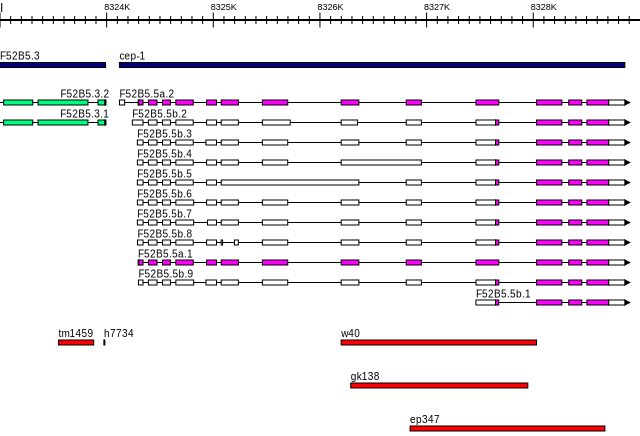

In [10]:
from IPython.display import *
#@markdown ###パラメータ 
画像サイズ = 640 #@param {type:'raw'}
リファレンス = 'nematode.bin' #@param {type:'string'}
アノテーション = 'nematode.db' #@param {type:'string'}
対象範囲 = 'I:8323000..8329000' #@param {type:'string'}
出力ファイル名 = 'map_CE.svg' #@param {type:'string'}
#@markdown ####表示内容
遺伝子 = True #@param {type:'boolean'}
転写産物 = True #@param {type:'boolean'}
変異 = True #@param {type:'boolean'}
#@markdown #####オプション
オリジナル領域の表示 = False #@param {type:'boolean'}
名称 = '' #@param {type:'string'}
位置 = '' #@param {type:'string'}
色 = ' ' #@param [' ', 'black', 'red', 'blue', 'green']

cmd = './GeneMapSVG -'
if 遺伝子 == True:
  cmd = cmd + 'g'
if 転写産物 == True:
  cmd = cmd + 't'
if 変異 == True:
  cmd = cmd + 'm'
cmd = cmd + ' -r "' + リファレンス +  '" -a "' + アノテーション + '" -w ' + str(画像サイズ) + ' -p ' + 対象範囲 + ' -o "' + 出力ファイル名 + '"'
if オリジナル領域の表示 == True:
  cmd = cmd + ' --custom "[{name='+名称+';pos='+位置+';col='+色+'}]"'
output = subprocess.check_output(cmd, shell=True, text=True)
display_svg(SVG(出力ファイル名))

#### コマンドライン（CUI）アプリとして使用する場合
以下のヘルプを参照に、コマンドを実行してください。

In [ ]:
!./GeneMapSVG --help

MapSVG v1.1.0
Copyright (c) 2019 Yuji Suehiro. All rights reserved. 
MIT license.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  MapSVG -r file -a file -p position -w value -o file { -tmgv } { --custom information }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --annot/-a          : *Annotation database file path.
  --custom            :  Show original features. 
Information should be defined as [{name=NNN;pos=1:12345..23456;col=red}, ...]
  --gene/-g           :  Show genes positions.
  --mut/-m            :  Show mutations positions.
  --out/-o            : *File path to export.
  --pos/-p            : *Position to obtain the map.
  --ref/-r            : *Reference file path.
  --trs/-t            :  Show transcripts positions.
  --var/-v            :  Show mutations positions.
  --width/-w          : *Width of viewport.

  --version/-V        : Show version.
  --help/-H           : Show help.
  --info/-I           : Show app informa

<a name="var-det"></a>
### 手順２-７ VariantDetectを使う
<font color="red">※注意  
このアプリを使用するには、GenomeConverterを使って作成したゲノム配列のバイナリファイルが必要です。</font>  

####  インストール方法
下セルを実行してください。

In [7]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VariantDetect.cpp -O Codes/VariantDetect.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VarAnalyzer.cpp -O Codes/VarAnalyzer.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VarAnalyzer.h -O Codes/VarAnalyzer.h
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VarSearch.cpp -O Codes/VarSearch.cpp
!g++ -std=c++11 -I/usr/local/include/slib -I./Codes -L/usr/local/lib -O2 -o VariantDetect Codes/VarAnalyzer.cpp Codes/VariantDetect.cpp Codes/VarSearch.cpp -lsapp -lsbioinfo -lsobj -lcurl

--2021-05-19 00:32:28--  https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VariantDetect.cpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8919 (8.7K) [text/plain]
Saving to: ‘Codes/VariantDetect.cpp’

Codes/VariantDetect 100%[===================>]   8.71K  --.-KB/s    in 0s      

2021-05-19 00:32:29 (56.6 MB/s) - ‘Codes/VariantDetect.cpp’ saved [8919/8919]

--2021-05-19 00:32:29--  https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VarAnalyzer.cpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response

#### 使用方法
下セルのパラメータ入力欄に必要事項を記入して、実行してください。  

> サンガーシーケンスのデータ：サンガーシーケンスのデータファイルパスを入力してください。
> <font color="blue">* ファイル形式はFASTまたはAB1に対応しています。</font>  

> リファレンス：GenomeConverterで作成したファイル名を入力してください。  


In [ ]:
#@markdown ###パラメータ 
サンガーシーケンスのデータ = '' #@param {type:'string'}
リファレンス = '' #@param {type:'string'}
#@markdown #####オプション

cmd = './VariantDetect' + ' -r "' + リファレンス + '" -i "' + サンガーシーケンスのデータ + '"'

output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

#### 使用例 (H.sapiens)
 

i. テスト用のSNPシーケンス (.fa)をダウンロードしてください。

In [ ]:
!wget https://drive.google.com/uc?id=1fjPJHbnU-42G8EvVE-dVefzv5mBTQ67c -O test.fa

ii. パラメータを入力して、実行してください。

 > 

In [ ]:
#@markdown ###パラメータ 
サンガーシーケンスのデータ = 'test.fa' #@param {type:'string'}
リファレンス = 'human.bin' #@param {type:'string'}
#@markdown #####オプション

cmd = './VariantDetect' + ' -r "' + リファレンス + '" -i "' + サンガーシーケンスのデータ + '"'

output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

8:19956191 (G->A substitution).



#### 使用例 (C.elegans)

i. テスト用のシーケンスファイル (.ab1)をダウンロード

In [ ]:
!wget https://drive.google.com/uc?id=1zD2uoiHrmVemxq_G18A0tHofQeyhGSVC -O test.ab1

ii. 実行してください。

In [11]:
#@markdown ###パラメータ 
サンガーシーケンスのデータ = 'test.ab1' #@param {type:'string'}
リファレンス = 'nematode.bin' #@param {type:'string'}
#@markdown #####オプション

cmd = './VariantDetect' + ' -r "' + リファレンス + '" -i "' + サンガーシーケンスのデータ + '"'

output = subprocess.check_output(cmd, shell=True, text=True)
print(output)

V:3937069-3937272 (204 bp deletion).



#### コマンドライン（CUI）アプリとして使用する場合
以下のヘルプを参照に、コマンドを実行してください。

In [ ]:
!./VariantDetect --help

VariantDetect v1.1.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT license.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  VariantDetect -r file -i file(fa/txt/seq/ab1) { -m size } { -t value } { -g size } { -s size }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --gap/-g            :  Permissible gap size.
  --input/-i          : *Input file path.
  --match/-m          :  Minimum match size.
  --ref/-r            : *Reference file path.
  --seed/-s           :  Seed size.
  --threshold/-t      :  Threshold to extend alignemnt.

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.
